# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        #retrieve data
        city_weather = requests.get(city_url).json()

        # max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 

print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | lolua
City not found. Skipping...
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | wanning
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | sarakhs
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | aykhal
Processing Record 14 of Set 1 | yumen
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | aripuana
Processing Record 19 of Set 1 | el alto
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | bagado
Processing Record 22 of Set 1 | grand river south east
City not found.

Processing Record 38 of Set 4 | foumban
Processing Record 39 of Set 4 | ouargaye
Processing Record 40 of Set 4 | cardston
Processing Record 41 of Set 4 | buluang
Processing Record 42 of Set 4 | brae
Processing Record 43 of Set 4 | avera
Processing Record 44 of Set 4 | port-cartier
Processing Record 45 of Set 4 | xining
Processing Record 46 of Set 4 | beringovskiy
Processing Record 47 of Set 4 | zyryanka
Processing Record 48 of Set 4 | rungata
City not found. Skipping...
Processing Record 49 of Set 4 | gdynia
Processing Record 0 of Set 5 | sfantu gheorghe
Processing Record 1 of Set 5 | khatanga
Processing Record 2 of Set 5 | nauen
Processing Record 3 of Set 5 | waingapu
Processing Record 4 of Set 5 | durban
Processing Record 5 of Set 5 | muros
Processing Record 6 of Set 5 | suez
Processing Record 7 of Set 5 | norman wells
Processing Record 8 of Set 5 | karratha
Processing Record 9 of Set 5 | brownsville
Processing Record 10 of Set 5 | mandalgovi
Processing Record 11 of Set 5 | thompson


Processing Record 25 of Set 8 | buseresere
Processing Record 26 of Set 8 | dunedin
Processing Record 27 of Set 8 | baruun-urt
Processing Record 28 of Set 8 | tarudant
City not found. Skipping...
Processing Record 29 of Set 8 | toamua
City not found. Skipping...
Processing Record 30 of Set 8 | eyl
Processing Record 31 of Set 8 | sept-iles
Processing Record 32 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 33 of Set 8 | matay
Processing Record 34 of Set 8 | candolim
Processing Record 35 of Set 8 | wattegama
Processing Record 36 of Set 8 | oistins
Processing Record 37 of Set 8 | agadez
Processing Record 38 of Set 8 | pamplona
Processing Record 39 of Set 8 | timon
Processing Record 40 of Set 8 | seymchan
Processing Record 41 of Set 8 | harlingen
Processing Record 42 of Set 8 | grand bank
Processing Record 43 of Set 8 | coihaique
Processing Record 44 of Set 8 | turayf
Processing Record 45 of Set 8 | wroclaw
Processing Record 46 of Set 8 | tsaratanana
Processing Record 

Processing Record 13 of Set 12 | tutoia
Processing Record 14 of Set 12 | la ronge
Processing Record 15 of Set 12 | guymon
Processing Record 16 of Set 12 | kalmunai
Processing Record 17 of Set 12 | termiz
Processing Record 18 of Set 12 | wasilla
Processing Record 19 of Set 12 | boende
Processing Record 20 of Set 12 | dutse
Processing Record 21 of Set 12 | dekar
Processing Record 22 of Set 12 | odweyne
City not found. Skipping...
Processing Record 23 of Set 12 | luderitz
Processing Record 24 of Set 12 | emba
Processing Record 25 of Set 12 | prievidza
Processing Record 26 of Set 12 | jardim
Processing Record 27 of Set 12 | matagami
Processing Record 28 of Set 12 | trairi
Processing Record 29 of Set 12 | axim
Processing Record 30 of Set 12 | ishigaki
Processing Record 31 of Set 12 | mindelo
Processing Record 32 of Set 12 | mao
Processing Record 33 of Set 12 | santiago
Processing Record 34 of Set 12 | wenling
Processing Record 35 of Set 12 | koboko
Processing Record 36 of Set 12 | pizarro
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [5]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ponta do sol,0,BR,1555802322,85,-20.63,-46.00,62.45,1.77
1,bluff,16,AU,1555802303,63,-23.58,149.07,77.41,19.35
2,east london,82,ZA,1555802323,72,-33.02,27.91,55.91,8.57
3,wanning,0,AT,1555802608,43,48.64,13.53,53.01,1.12
4,kapaa,40,US,1555802211,61,22.08,-159.32,80.60,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

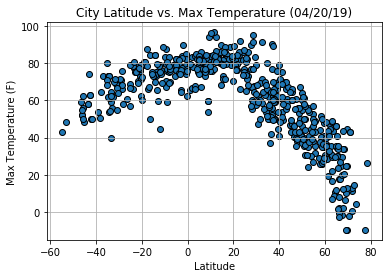

In [6]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Max_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

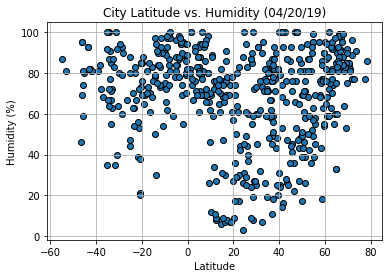

In [7]:
# Build the scatter plots for each city types
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

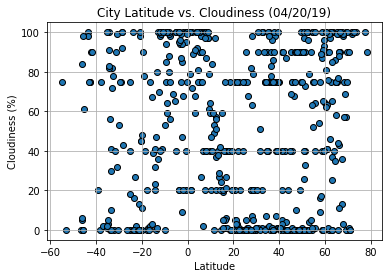

In [8]:
# Build the scatter plots for each city types
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

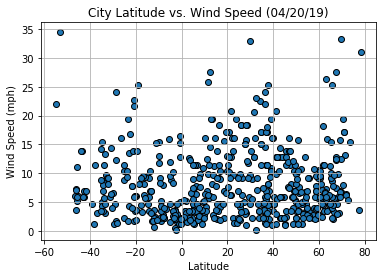

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()